<a href="https://colab.research.google.com/github/seemapr22/Customer_Segmentation_Clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Context**

In this project, I have performed an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I have divided customers into segments to optimize the significance of each customer to the business and to modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

# **2. Importing Libraries**

In [ ]:
#Importing the Libraries

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# sklearn library

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# **3. About the dataset**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
Promotion


**NumDealsPurchases: Number of purchases made with a discount**

* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

# **4. Loading Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Customer Segmentation/marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **5. Cleaning Data**

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df=df.dropna()
df.shape

(2216, 29)

In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
dates=[]
for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)

print("the newest customer's enrolement date", max(dates))
print("the oldest customer's enrolement date", min(dates))

the newest customer's enrolement date 2014-12-06
the oldest customer's enrolement date 2012-01-08


In [ ]:
# creating a feature 'Customer_for'

days = []
d1 = max(dates)
for i in dates:
  delta = d1 - i
  days.append(delta)

df['Customer_For'] = days
df['Customer_For'] = pd.to_numeric(df['Customer_For'],errors='coerce')

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Customer_For           0
dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
# Age of Customer today
df['Age'] = 2023-df['Year_Birth']

# total spending on various items
df['Spent'] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Deriving living situation by marital status "Alone"
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner','Single':'Alone',
                                                  'Divorced':'Alone','Widow':'Alone','Absurd':'Alone','YOLO':'Alone'})

# total children living in the household
df['Children'] = df['Kidhome'] + df['Teenhome']

# total members in the family
df['Family_Size'] = df['Living_With'].replace({'Alone':1,'Partner':2})+df['Children']

# Feature pertaining parenthood
df['Is_Parent'] = np.where(df['Children']>0,1,0)

# Segmenting the education level into 3 groups
df['Education'] = df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                           "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                      "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Dropping some of the redundant features
redundant = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(redundant, axis=1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+04,2.517308e+04,1730.0,3.530300e+04,5.138150e+04,6.852200e+04,6.666660e+05
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
Wines,2216.0,3.050916e+02,3.373279e+02,0.0,2.400000e+01,1.745000e+02,5.050000e+02,1.493000e+03
Fruits,2216.0,2.635605e+01,3.979392e+01,0.0,2.000000e+00,8.000000e+00,3.300000e+01,1.990000e+02
Meat,2216.0,1.669959e+02,2.242833e+02,0.0,1.600000e+01,6.800000e+01,2.322500e+02,1.725000e+03
Fish,2216.0,3.763764e+01,5.475208e+01,0.0,3.000000e+00,1.200000e+01,5.000000e+01,2.590000e+02
Sweets,2216.0,2.702888e+01,4.107205e+01,0.0,1.000000e+00,8.000000e+00,3.300000e+01,2.620000e+02
Gold,2216.0,4.396525e+01,5.181541e+01,0.0,9.000000e+00,2.450000e+01,5.600000e+01,3.210000e+02


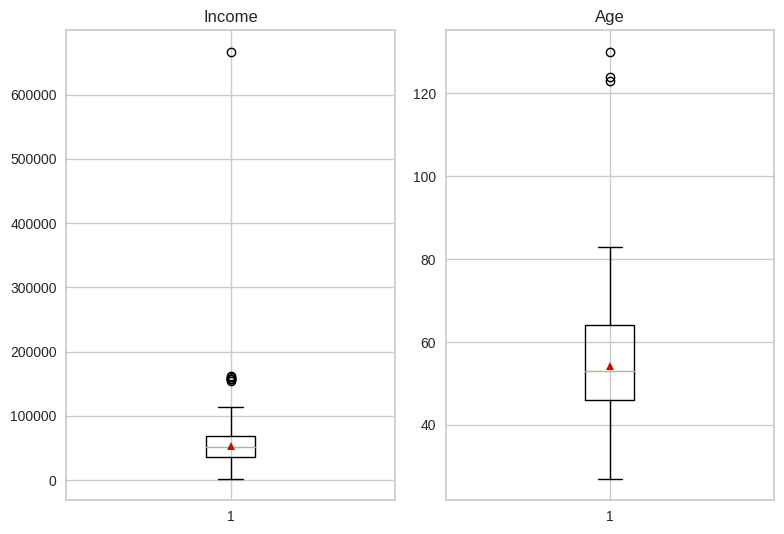

In [ ]:
cols = ['Income','Age']
for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     plt.boxplot(df[variable],showmeans=True)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [ ]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [ ]:
df.shape

(2212, 30)

<Axes: >

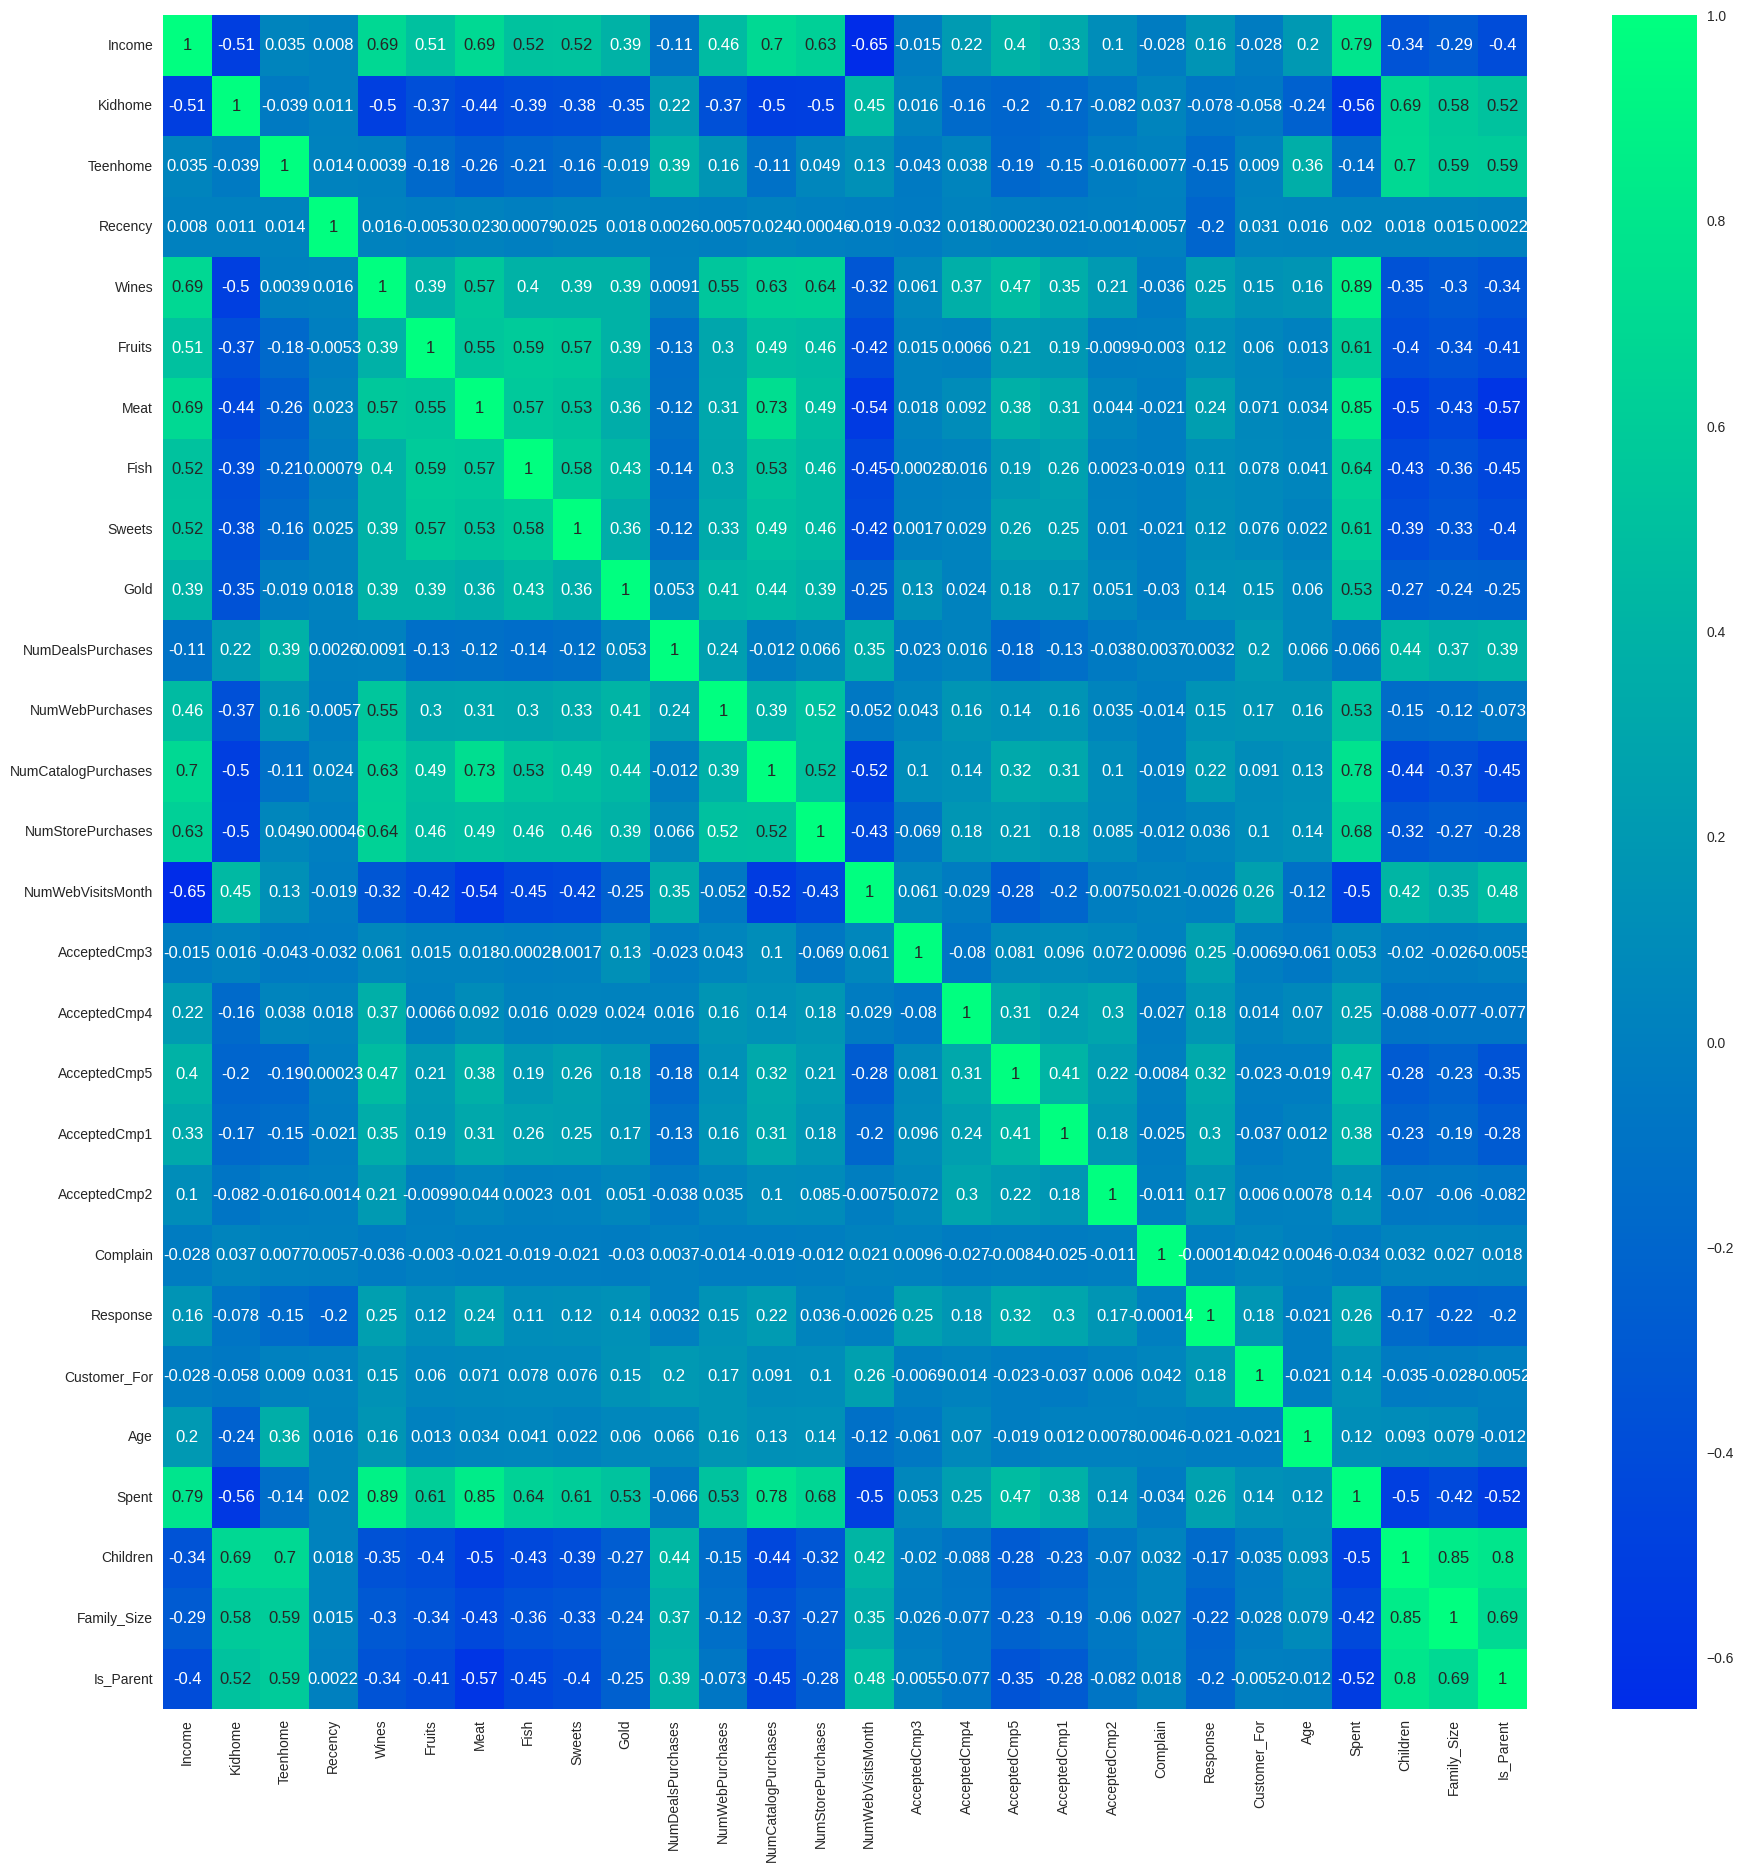

In [ ]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(),annot=True, cmap='winter', center=0)

# **6. Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [ ]:
object_cols=list(df.dtypes[df.dtypes=='object'].index)
object_cols

['Education', 'Living_With']

In [ ]:
# Label encoding the object datatypes

le=LabelEncoder()
for i in object_cols:
  df[i]= df[[i]].apply(le.fit_transform)

In [ ]:
df[['Education','Living_With']]

,Education,Living_With
0,0,0
1,0,0
2,0,1
3,0,1
4,1,1
...,...,...
2235,0,1
2236,1,1
2237,0,0
2238,1,1


In [ ]:
data=df.copy()

cols_del=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data=data.drop(cols_del,axis=1)

# Scaling
scaler=StandardScaler()
scaler.fit_transform(data)

scaled_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [ ]:
scaled_data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


# **7. Dimensionality Reduction**

In [ ]:
# Initiating pca to reduce dimesions aka features to 3
pca = PCA(n_components=3)
pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca.fit_transform(scaled_data),columns=['col1','col2','col3'])

NameError: ignored

In [ ]:
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.569775e-17,2.878377,-5.969401,-2.538492,-0.780422,2.383289,7.444306
col2,2212.0,1.927331e-17,1.706839,-4.312188,-1.328185,-0.157471,1.242428,6.142281
col3,2212.0,1.172460e-16,1.221950,-3.537445,-0.829274,-0.024505,0.800185,6.642166


In [ ]:
# 3D projection of data in reduced dimesion
x=pca_data['col1']
y=pca_data['col2']
z=pca_data['col3']


# **8. Clustering**

Elbow Method to determine the number of clusters to be formed:


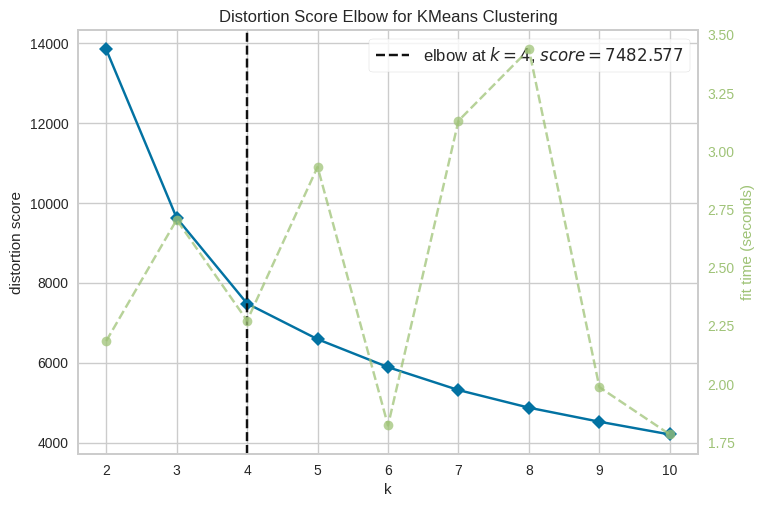

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Visualizer = KElbowVisualizer(KMeans(), k=10)
Visualizer.fit(pca_data)
Visualizer.show()

In [ ]:
# Agglomerative Hierarchial Clustering model
ac = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
# fit model and predict clusters
y_hat = ac.fit_predict(pca_data)

# Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= y_hat

In [ ]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,1,83894400000000000,66,1617,0,0,1,0,3
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,10800000000000000,69,27,0,2,3,1,0
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,40780800000000000,58,776,1,0,2,0,3
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,5616000000000000,39,53,1,1,3,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,27734400000000000,42,422,1,1,3,1,0


In [ ]:
# plotting the cluster

fig = plt.figure(figsize=(8,8))
fig=px.scatter_3d(df,x,y,z,color ='Clusters' )
fig.show()

<Figure size 800x800 with 0 Axes>

# **9. Evaluating model**

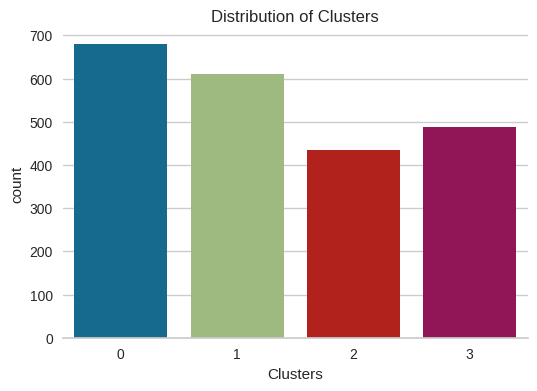

In [ ]:
# plotting the countplot of the clusters
plt.figure(figsize=(6,4))
sns.countplot(x=df['Clusters'],data=df,)
plt.title('Distribution of Clusters')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.show()

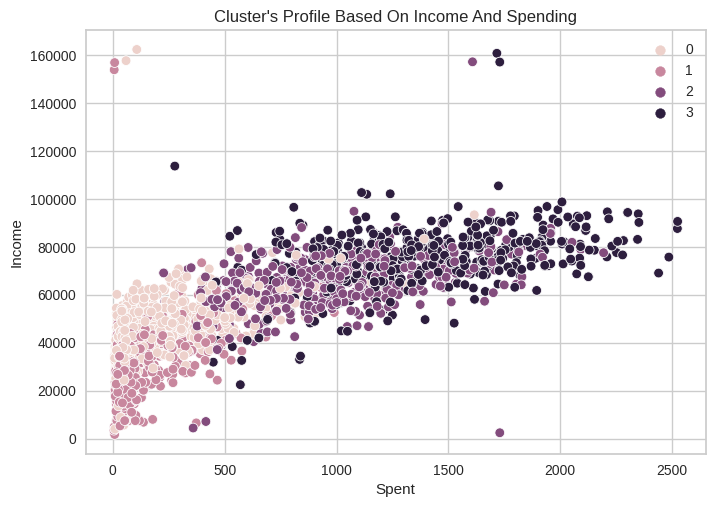

In [ ]:
sns.color_palette("magma", as_cmap=True)
sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

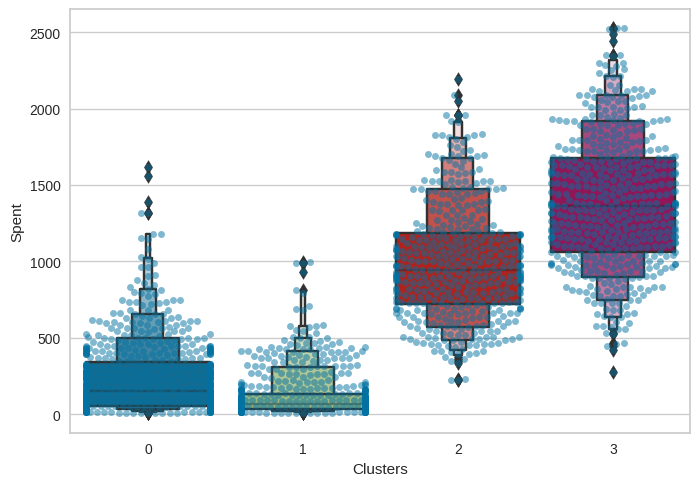

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Clusters'],
      dtype='object')

<Figure size 800x550 with 0 Axes>

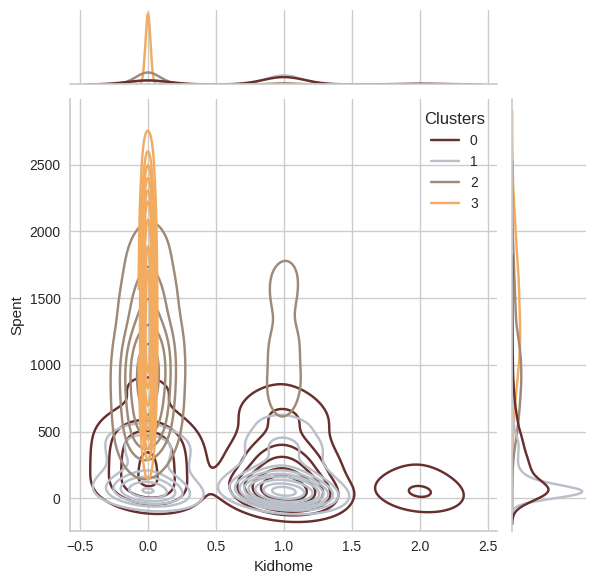

<Figure size 800x550 with 0 Axes>

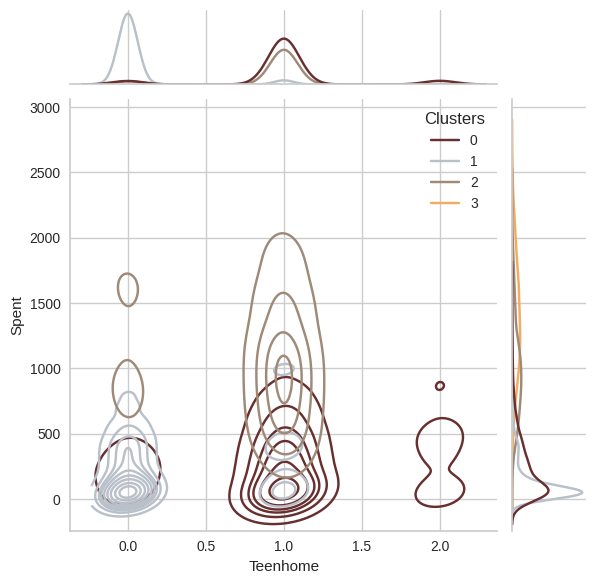

<Figure size 800x550 with 0 Axes>

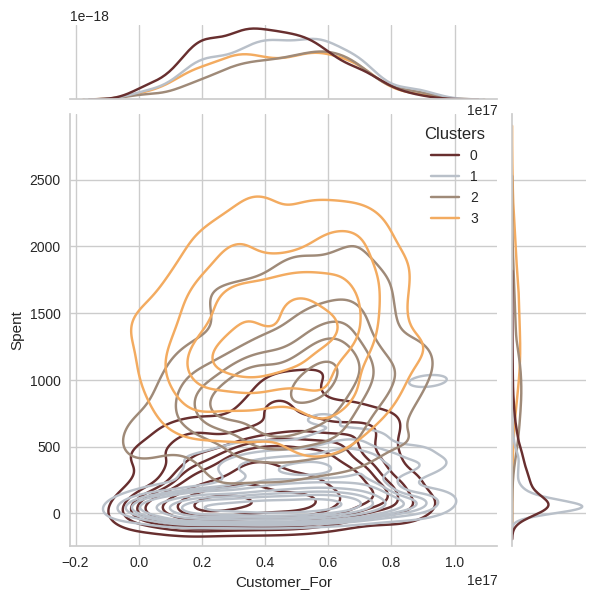

<Figure size 800x550 with 0 Axes>

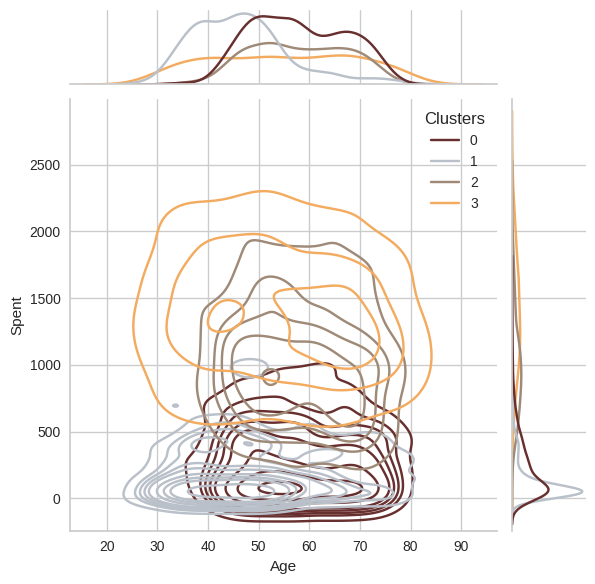

<Figure size 800x550 with 0 Axes>

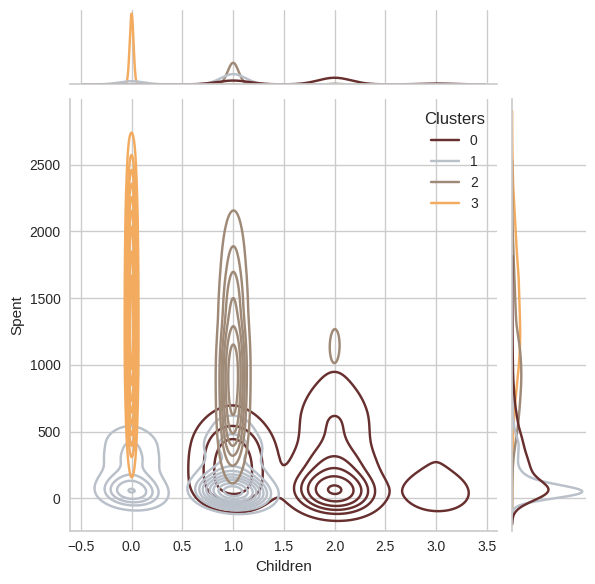

<Figure size 800x550 with 0 Axes>

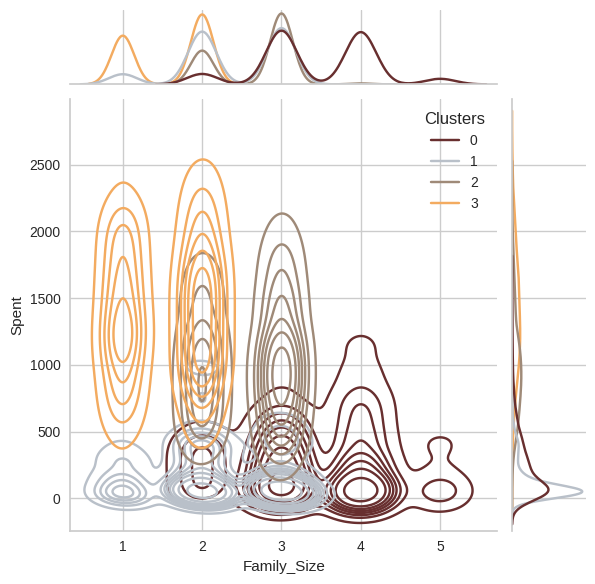

<Figure size 800x550 with 0 Axes>

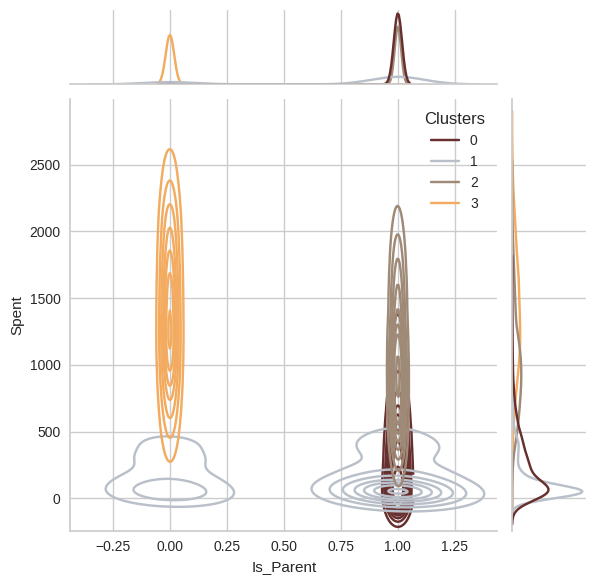

<Figure size 800x550 with 0 Axes>

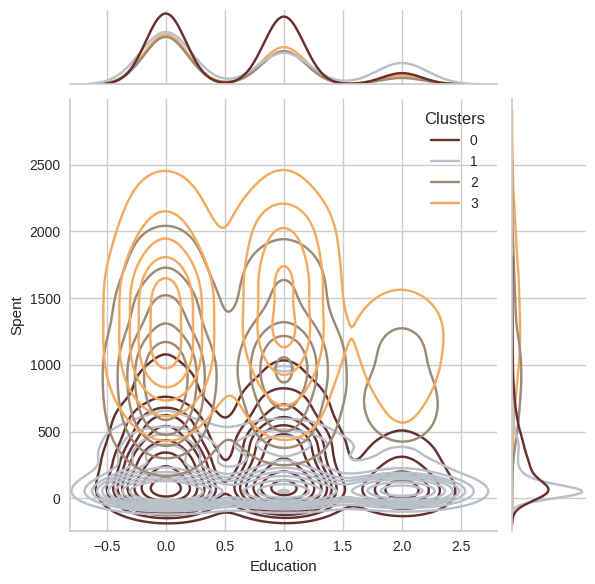

<Figure size 800x550 with 0 Axes>

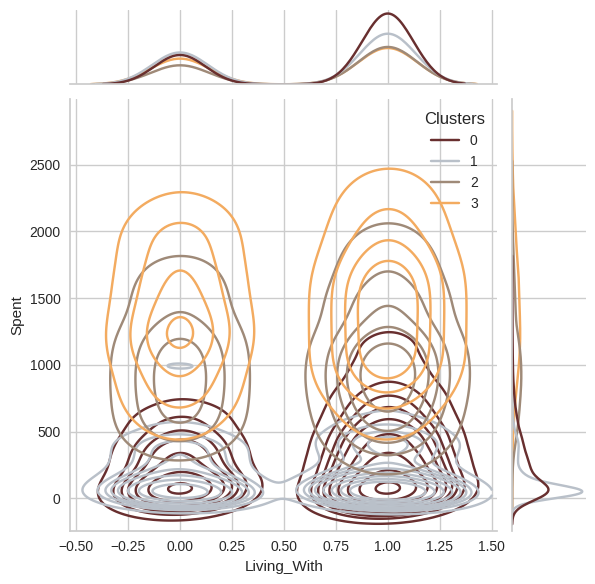

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()

    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])
    plt.show()

In [ ]:
cols=['Age','Income','Spent']
for i in cols:
  print(i,'details')
  print(df[i].describe())
  print('-'*60)

Age details
count    2212.000000
mean       54.086347
std        11.701599
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64
------------------------------------------------------------
Income details
count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64
------------------------------------------------------------
Spent details
count    2212.000000
mean      607.268083
std       602.513364
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: Spent, dtype: float64
------------------------------------------------------------


In [ ]:
df['Agebin'] = pd.cut(df['Age'], bins = [20, 30, 40, 50, 60, 80, 100],
                           labels = ['20-30','31-40', '41-50', '51-60', '61-80','81-100'])
df['Incomebin'] = pd.cut(df['Income'],bins=[0,20000,40000,60000,80000,200000],
                         labels=['<20000','<40000','<60000','<80000','<200000'])
df['Spent_bin'] = pd.cut(df['Spent'],bins = [0,50,100,200,400,600,800,1000,2000],
                     labels = ['<50','<100','<200','<400','<600','<800','<1000','<2000'])

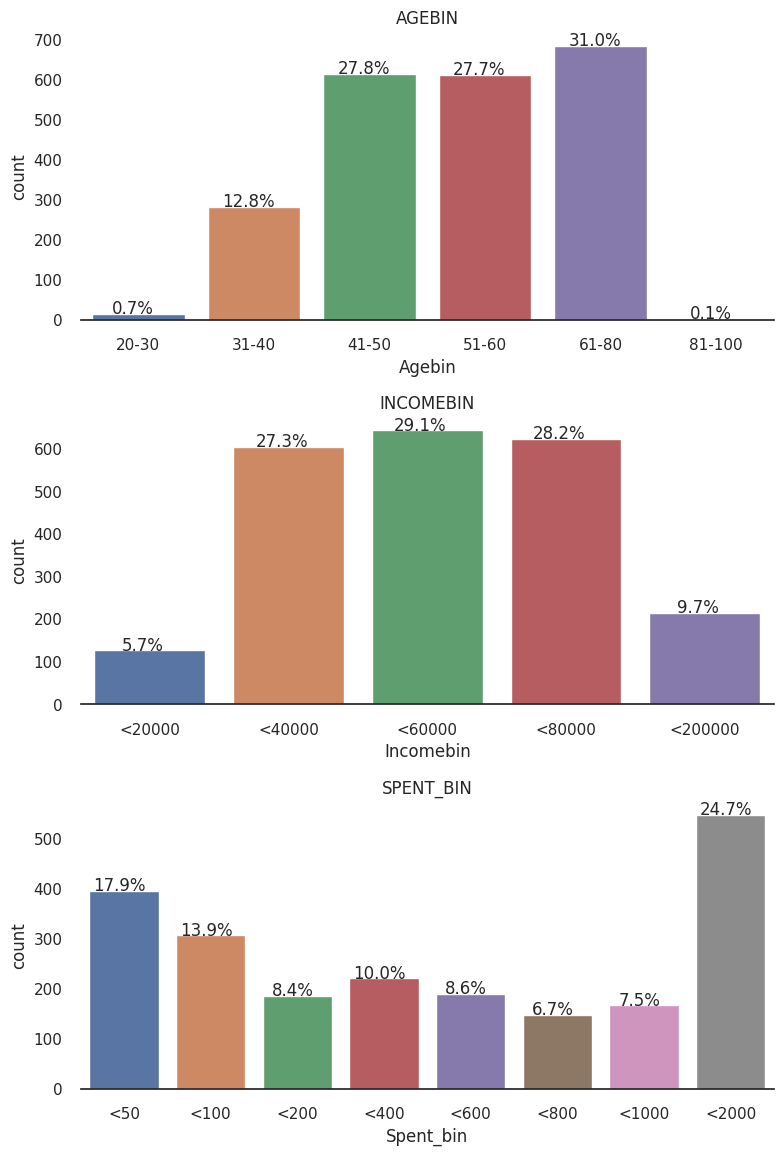

In [ ]:
bin_cols=['Agebin','Incomebin','Spent_bin']

plt.figure(figsize=(8,15))
sns.set_theme(style="white")
for i, variable in enumerate(bin_cols):
                     plt.subplot(4,1,i+1)
                     order = df[variable].value_counts(ascending=False).index
                     ax=sns.countplot(x=df[variable], data=df)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(bin_cols[i].upper())

In [ ]:

# Function to plot stacked bar chart
def stacked_plot(x):

    tab = pd.crosstab(x,df['Clusters'],normalize='index')
    sns.set_palette(sns.color_palette("magma", 8))
    tab.plot(kind='bar',stacked=True,figsize=(5,3))
    plt.xticks(rotation=360)
    labels=[0,1,2,3]
    plt.legend(loc="upper left", labels=labels,title="Clusters",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.show()

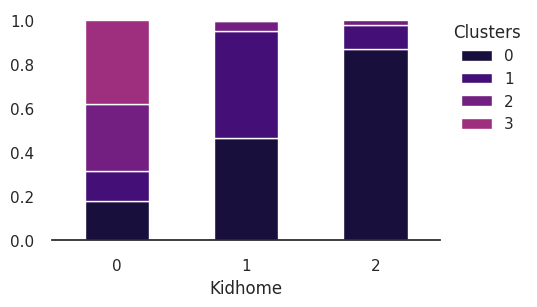

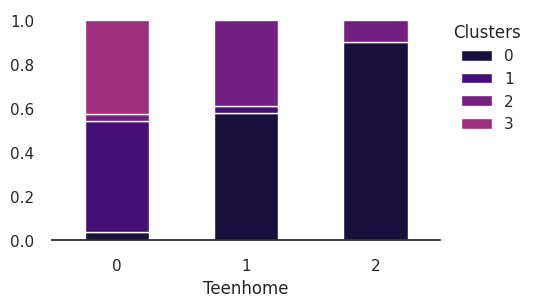

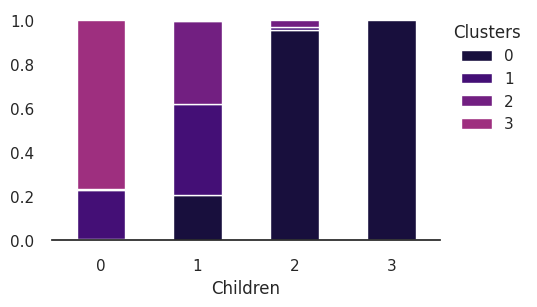

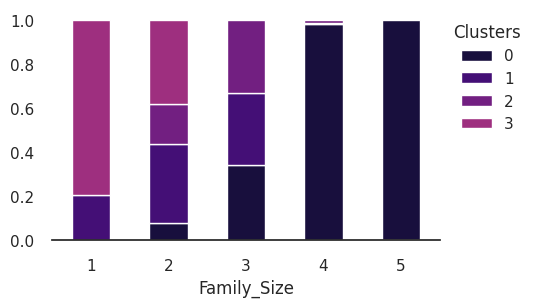

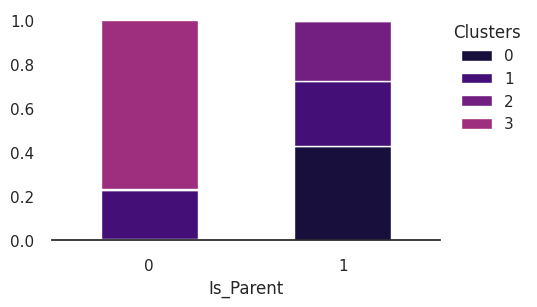

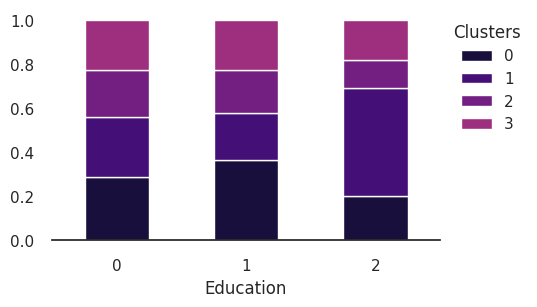

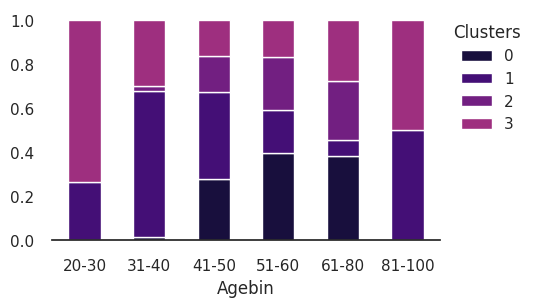

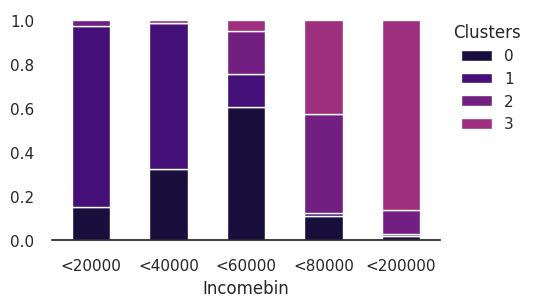

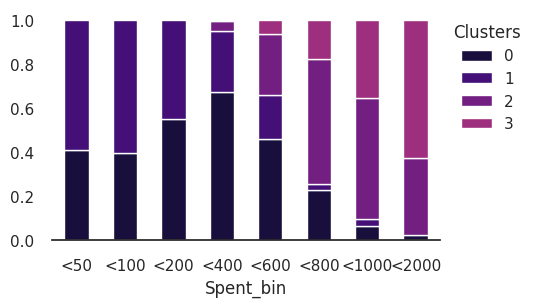

In [ ]:
list = [ "Kidhome","Teenhome", "Children", "Family_Size", "Is_Parent", "Education",'Agebin','Incomebin','Spent_bin']
for i, variable in enumerate(list):
       stacked_plot(df[variable])

# **10. Profiling the clusters**

| Name   |Cluster-0   |Cluster-1   |Cluster-2   |Cluster-3  |
|--------|------------|------------|------------|-----------|
|   Age  |   40-80    |    30-50   |   40-80    |20-30 , 80-100|
|Income  |  40K-60K   |   <40K     |  60K-80K   |   >80K    |
| Spent  |   <600     |   <400     |    >600    |   >800    |
| Kid at home | mostly 2 kid | mostly 1 kid | no kid |no kid |
|Teen at home |  1-2 teen    |   1 teen     | no teen|no teen|
|  Children   |      2-3     |   mostly 1   | mostly 1 |  0  |
| family size |      4-5     |      2-3     | 2-3    |  1-2  |
| is parent ? | definitely parent | some are parent | definitely parent |  they are not parent  |

# **11. Conclusion**

In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.